In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = iris.data
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
X=data1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=data1['target']

In [16]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data1,random_state=0,train_size=0.7,test_size=0.3)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y)
y_test.shape

(38,)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
clf_kn=KNeighborsClassifier()

In [83]:
clf_kn.fit(X_train,y_train)

KNeighborsClassifier()

In [84]:
y_train_pred=clf_kn.predict(X_train)
y_test_pred=clf_kn.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.9642857142857143

In [86]:
accuracy_score(y_test,y_test_pred)

0.9736842105263158

In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))

[[39  0  0]
 [ 0 33  3]
 [ 0  1 36]]


In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[11  0  0]
 [ 0 14  0]
 [ 0  1 12]]


In [92]:
lista_accuracy_train = []
lista_accuracy_test = []
i=0
# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors= k_vecinos[i])
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    i+=1

Text(0, 0.5, 'test')

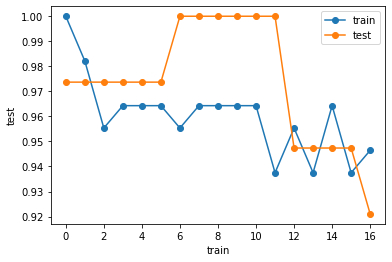

In [93]:
plt.plot(lista_accuracy_train,'o-',label='train' )
plt.plot(lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('train')
plt.ylabel('test')

<ipython-input-106-cb34b9138836>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-106-cb34b9138836>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-106-cb34b9138836>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and

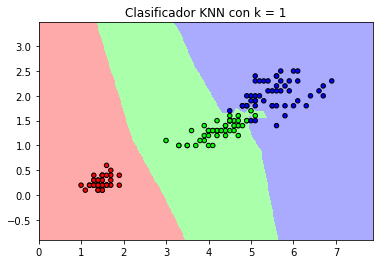

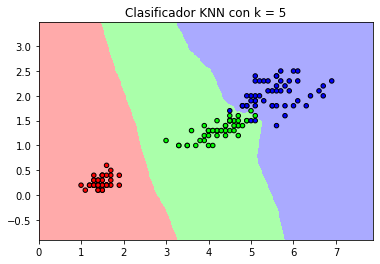

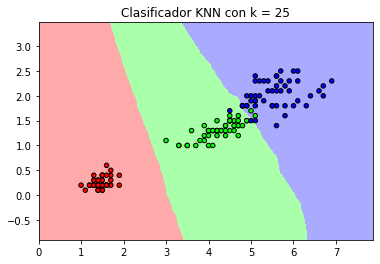

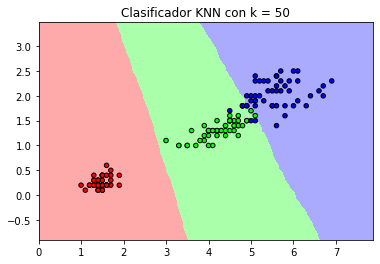

In [106]:
from matplotlib.colors import ListedColormap

X = data1[['petal length (cm)', 'petal width (cm)']].values

y = data1.target
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1,5,25,50]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador KNN con k = %i"% (k))

In [97]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state = 42)

In [98]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [99]:
y_train_pred=tree.predict(X_train)

In [100]:
y_test_pred=tree.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

1.0

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9473684210526315

In [103]:
lista_accuracy_train = []
lista_accuracy_test = []
i=0
# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    tree1=DecisionTreeClassifier(max_depth=max_depths[i],random_state=42)
    tree1.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree1.predict(X_train)
    train_acc = accuracy_score(y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree1.predict(X_test)
    test_acc = accuracy_score(y_test,y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    i+=1

Text(0, 0.5, 'test')

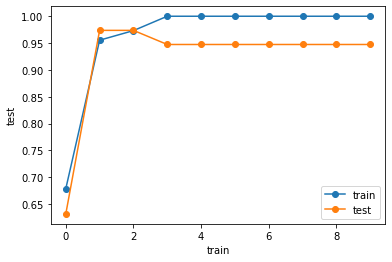

In [104]:
plt.plot(lista_accuracy_train,'o-',label='train' )
plt.plot(lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('train')
plt.ylabel('test')

<ipython-input-105-175c23f13537>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-105-175c23f13537>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-105-175c23f13537>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and

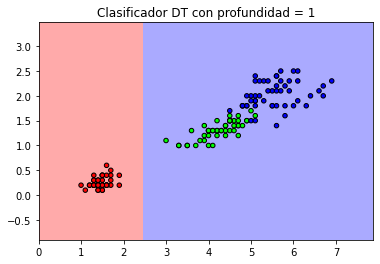

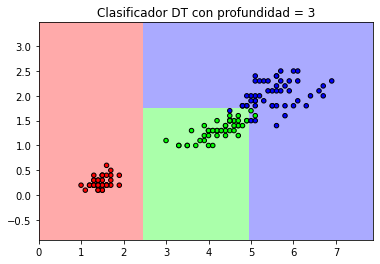

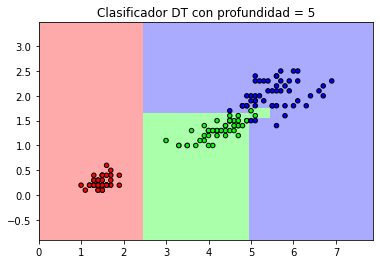

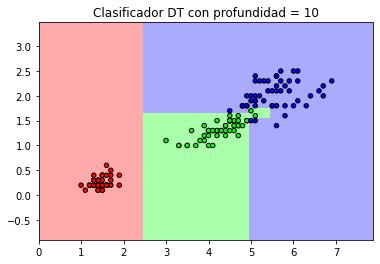

In [105]:
X = data1[['petal length (cm)', 'petal width (cm)']].values
y = data1.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for max_depth in [1,3,5,10]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador DT con profundidad = %i"% (max_depth))

In [107]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
data = sns.load_dataset('Titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [109]:
data.shape

(891, 15)

In [111]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [131]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [132]:
data.dropna()
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [134]:
X=['sex','age','pclass','fare','adult_male','survived']

data2 = sns.load_dataset('Titanic',usecols=X)
data2['age'].fillna(data2['age'].mean(),inplace=True)
data2.isnull().sum()

survived      0
pclass        0
sex           0
age           0
fare          0
adult_male    0
dtype: int64

In [135]:
mascara_muj=data2.sex=='female'
mascara_hom=data2.sex=='male'

In [136]:
X_train=data2[mascara_muj][['fare','age','adult_male','pclass']]
X_test=data2[mascara_hom][['fare','age','adult_male','pclass']]
y_train=data2[mascara_muj]['survived']
y_test=data2[mascara_hom]['survived']

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
clf_kn=KNeighborsClassifier()

In [139]:
clf_kn.fit(X_train,y_train)

KNeighborsClassifier()

In [141]:
y_train_pred=clf_kn.predict(X_train)
y_test_pred=clf_kn.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8248407643312102

In [144]:
accuracy_score(y_test,y_test_pred)

0.37954939341421146

In [145]:
X1=data2[['fare','age','adult_male','pclass']]
y1=data2['survived']

In [146]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data1,random_state=0,train_size=0.7,test_size=0.3)

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1)

In [148]:
clf_kn1=KNeighborsClassifier()

In [149]:
clf_kn1.fit(X_train,y_train)

KNeighborsClassifier()

In [150]:
y_train_pred=clf_kn1.predict(X_train)
y_test_pred=clf_kn1.predict(X_test)

In [151]:
accuracy_score(y_train,y_train_pred)

0.7934131736526946

In [152]:
accuracy_score(y_test,y_test_pred)

0.7309417040358744

In [156]:
from sklearn.metrics import f1_score
f1_score( y_train , y_train_pred)

0.7172131147540984

In [159]:
f1_score( y_test , y_test_pred)

0.6341463414634146

In [157]:
from sklearn.metrics import matthews_corrcoef

In [158]:
matthews_corrcoef( y_train , y_train_pred)

0.558550875226518

In [160]:
matthews_corrcoef( y_test , y_test_pred)

0.4213803840166061

In [171]:
from sklearn.metrics import balanced_accuracy_score

In [172]:
balanced_accuracy_score(y_train, y_train_pred)

0.7715874811463047

In [173]:
balanced_accuracy_score(y_test, y_test_pred)

0.7106901920083031